In [2]:
from src.graphs.berlin_map import *
# from src.graphs.simple import *

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

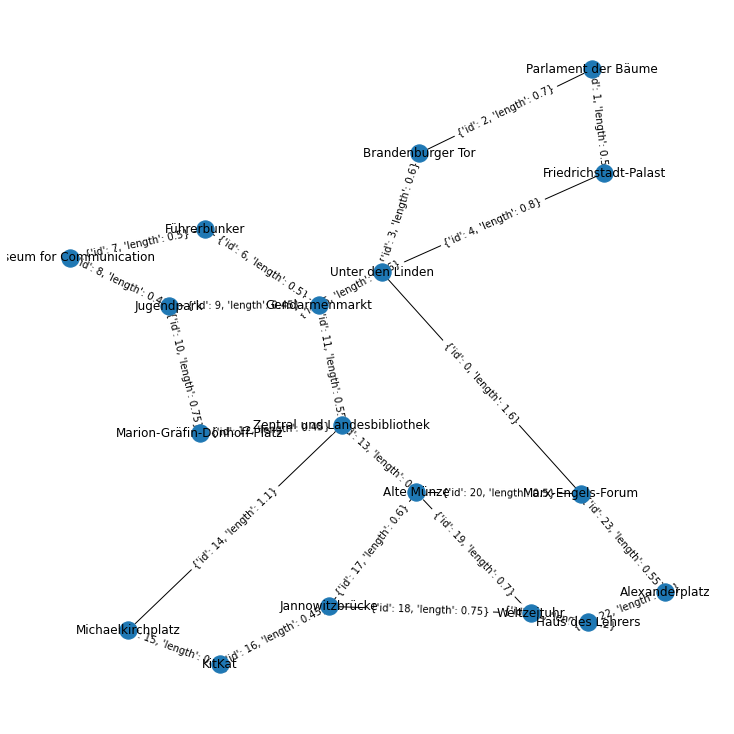

In [28]:
G = nx.Graph()
for id, (u, v, length) in enumerate(edges):
    G.add_edge(u, v, id=id, length=length)

plt.figure(figsize=(10, 10))

pos = nx.kamada_kawai_layout(G, weight="length")
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos)

plt.show()

In [29]:
adj = np.zeros((len(G.edges), len(G.edges)))

for u, v, i in G.edges.data("id"):
    for node in [u, v]:
        for edge in G[node].values():
            adj[i, edge["id"]] += 1
adj = np.where(adj, 1, 0)

adj = adj - np.identity(adj.shape[0])
adj = adj / np.sum(adj, axis=1)

print(adj)

[[0.         0.         0.         0.25       0.25       0.16666667
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.2        0.         0.         0.33333333]
 [0.         0.         0.5        0.         0.25       0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.25       0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.2        0.         0.5        0.         0.25       0.16666667
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         

In [57]:
def get_steady_states(adj):
    eigvecs = np.linalg.eig(adj)[1]

    # we only want eigenvectors which can be interpreted as likelihoods
    # this means only eigenvectors whose elements all have the same sign
    pos_eigvecs = eigvecs[:, np.all(eigvecs >= 0, axis=0) | np.all(eigvecs <= 0, axis=0)]

    # normalize to get steady state distributions (and kill negatives)
    pos_eigvecs /= np.sum(pos_eigvecs, axis=0)

    # columns are steady states
    return pos_eigvecs

pos_eigvecs = get_steady_states(adj)
pos_eigvecs

array([[0.05434783],
       [0.02173913],
       [0.02173913],
       [0.04347826],
       [0.04347826],
       [0.06521739],
       [0.04347826],
       [0.02173913],
       [0.0326087 ],
       [0.05434783],
       [0.0326087 ],
       [0.06521739],
       [0.04347826],
       [0.06521739],
       [0.04347826],
       [0.02173913],
       [0.0326087 ],
       [0.05434783],
       [0.04347826],
       [0.05434783],
       [0.05434783],
       [0.0326087 ],
       [0.02173913],
       [0.0326087 ]])

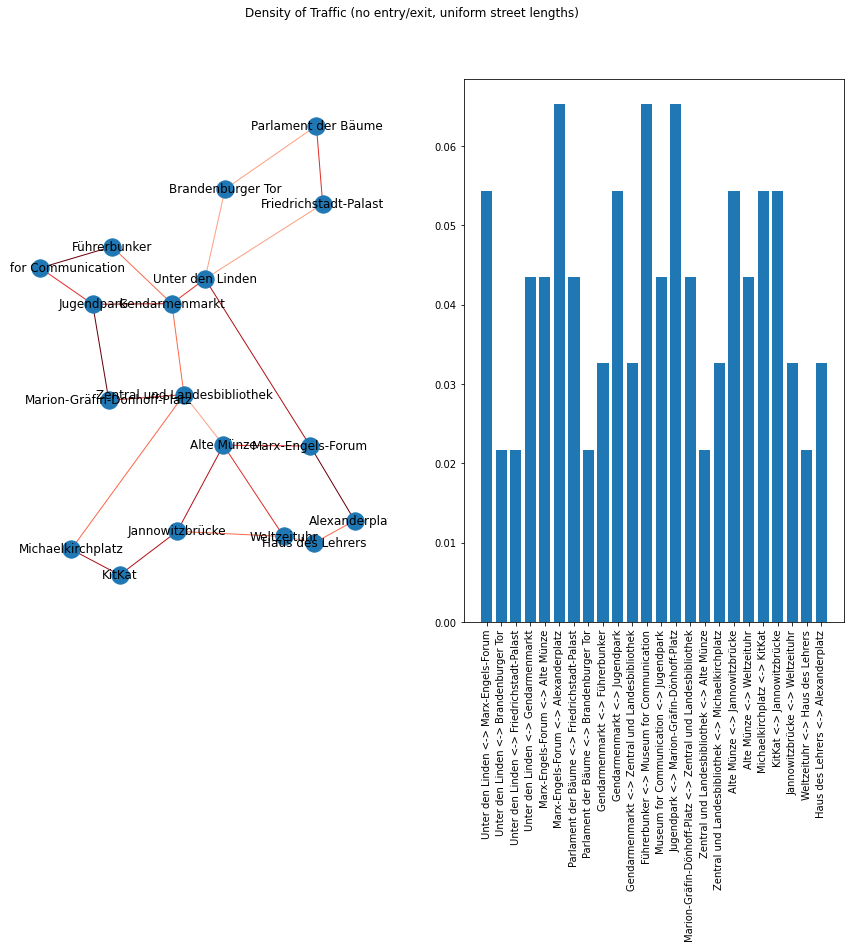

In [93]:
A = pos_eigvecs[:, 0].reshape(-1)

fig = combined_density_plot(A)


fig.suptitle("Density of Traffic (no entry/exit, uniform street lengths)")
plt.show()

In [15]:
np.random.seed(1)
foo = np.random.random((3, 3))
i = np.identity(3)

print(np.linalg.eig(foo)[1])
print(np.linalg.eig(foo * (0.1*i))[1])


[[ 0.68744958  0.74299249 -0.27657509]
 [ 0.38964259 -0.6539094   0.02478992]
 [ 0.61285539  0.14270479  0.96067251]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
